In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal
from scipy import stats
import pandas as pd


In [2]:
#Read-in data
file1='grizps11aop.csv'
data1 = ascii.read(file1,format='csv')

#detections
tg = data1['phaseg']+0.525965
amg = data1['mag_absg']
amge = data1['dmag_absg']
ti = data1['phasei']+0.525965
ami = data1['mag_absi']
amie = data1['dmag_absi']
tr = data1['phaser']+0.525965
amr = data1['mag_absr']
amre = data1['dmag_absr']
tz = data1['phasez']+0.525965
amz = data1['mag_absz']
amze = data1['dmag_absz']

#apparent limit mags
tuz = data1['time_lz']+0.525965
amuzp = data1['mag_lz']

tur = data1['time_lr']+0.525965
amurp = data1['mag_lr']

tuip = data1['time_li']+0.525965
amuip = data1['mag_li']

tugp = data1['time_lg']+0.525965
amugp = data1['mag_lg']

#upper limits
tuz = data1['time_lz']+0.525965
amuz = data1['mag_abslz']

tur = data1['time_lr']+0.525965
amur = data1['mag_abslr']

tui = data1['time_li']+0.525965
amui = data1['mag_absli']

tug = data1['time_lg']+0.525965
amug = data1['mag_abslg']



In [12]:
#data1
#tr[np.where(tr>356)], amr[np.where(tr>356)]
#at 90.3601-- abs_mr = -19.892855---app_mr = 20.040148, at 357-- mr= -18.493981--21.4390

In [43]:
#Convert Apparent magnitudes to absolute magnitude
#22.3866	 -17.592322, 22.9181	-17.093751	
d = 1070.1 *1e6 #pc
m = 22.9181
z = 0.218
M = m-2.5*np.log10((d/10)**2)+2.5*np.log10(1+z) 
M

-17.014903599547942

In [14]:
#convert absolute mag to apparent mag
d = 1070.1 *1e6 #pc
z = 0.218
M =  -18.493981 #-24.0 #-15.5
m = M + 2.5*np.log10((d/10)**2)-2.5*np.log10(1+z) 
m

21.43902259954794

In [ ]:
-15.5, -24.0 24.433, 15.933

/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_3034/3211339093.py:53: RuntimeWarning: invalid value encountered in power
  return F0*(t-t0)**alpha
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_3034/3211339093.py:61: RuntimeWarning: divide by zero encountered in log10
  model_f_mags = -2.5*np.log10(model_f)
/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_3034/3211339093.py:61: RuntimeWarning: invalid value encountered in multiply
  model_f_mags = -2.5*np.log10(model_f)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.fra

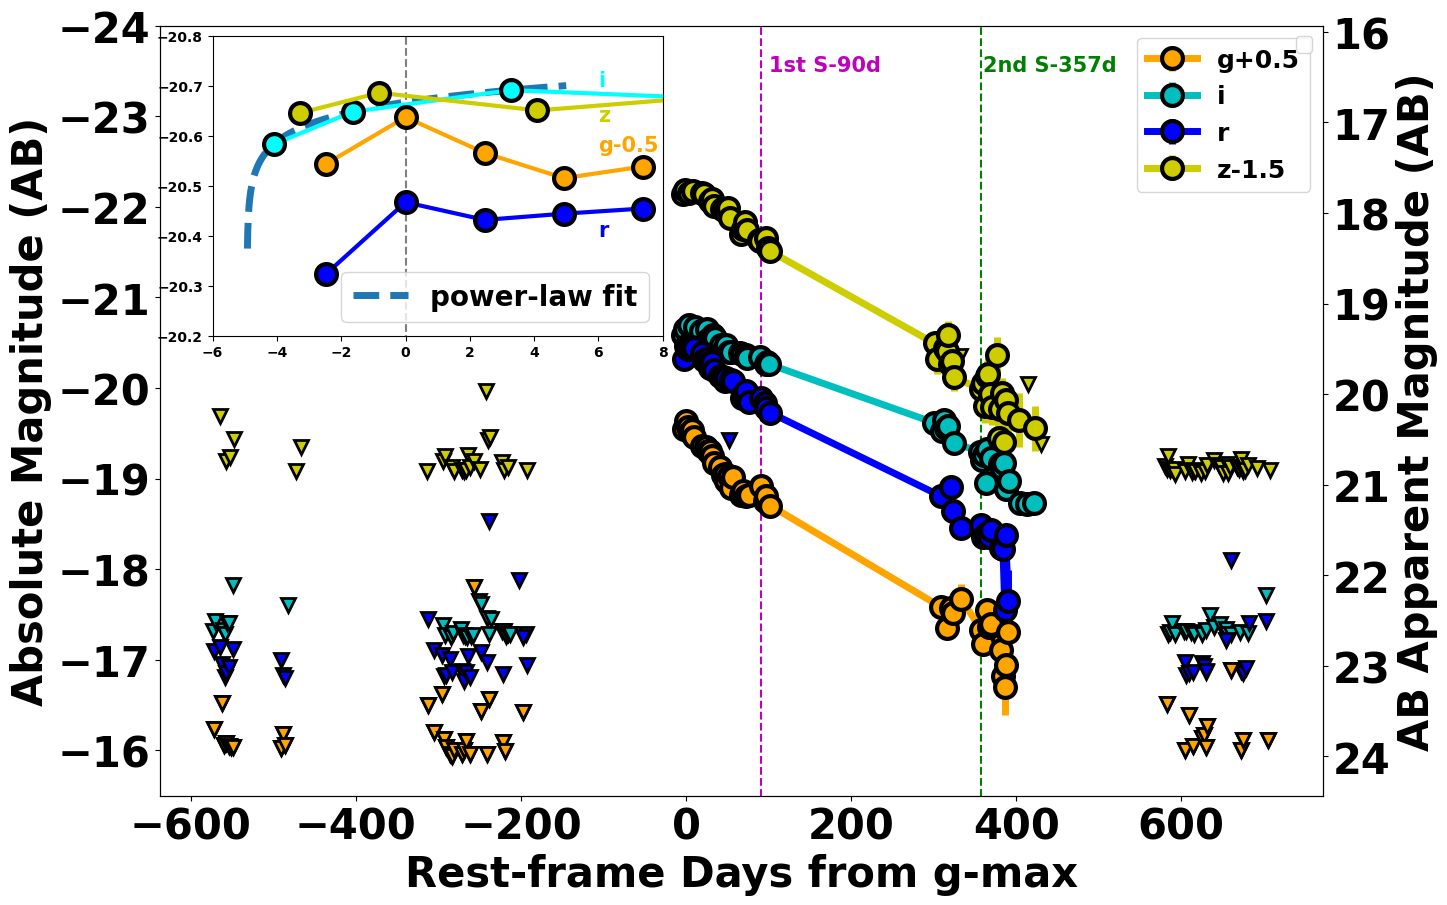

In [4]:
from scipy.optimize import curve_fit
from matplotlib import rc,rcParams
rc('font', weight='bold')

fig,ax1 = plt.subplots(figsize=(15,10.0))
file1='bol1.csv'
data2 = ascii.read(file1,format='csv')
t = data2['t0']
magabs = data2['mag_abs']
magerror =  data2['dmag']
yerr =  magerror

plt.errorbar(tg[:42],amg[:42]+0.5,yerr=amge[:42],marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'g+0.5',linewidth = 5)
plt.errorbar(ti[:42],ami[:42],yerr=amie[:42], marker ='o', color = 'c',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'i',linewidth = 5)
plt.errorbar(tr[:42],amr[:42],yerr=amre[:42],marker ='o', color = 'b',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'r',linewidth = 5)
plt.errorbar(tz[:46],amz[:46]-1.5,yerr=amze[:46],marker ='o', color = '#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'z-1.5',linewidth = 5)

#upper limit
plt.plot(tug,amug+0.5,marker= 'v',color ='orange',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
plt.plot(tui,amui,marker= 'v',color ='c',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
plt.plot(tur,amur,marker= 'v',color ='b',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
plt.plot(tuz,amuz-1.5,marker= 'v',color ='#CDCD00',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)

ax1.plot(tug,amug+0.5,marker= 'v',color ='orange',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
#ax1.plot([0,0],[-15,-24],color = 'gray',linestyle = '--')#,label = 'g-max')
ax1.plot([90.4400000000023,90.4400000000023],[-15,-24],color = 'm',linestyle = '--')#,label = '1st S-90d')
ax1.plot([357.440000000002,357.440000000002],[-15,-24],color = 'g',linestyle = '--')#,label = '2nd S-357d')

#plt.text(0.5,-23.5,'g-max',color='gray',fontsize=15)
plt.text(100,-23.5,'1st S-90d',color='m',fontsize=15)
plt.text(360,-23.5,'2nd S-357d',color='g',fontsize=15)

#plt.yscale('log')
#plt.xscale('log')
ax1.set_ylim(-15.5,-24)
ax1.set_xlabel('Rest-frame Days from g-max',fontsize =30,fontweight='bold')
ax1.set_ylabel(r'Absolute Magnitude (AB)',fontsize=30,fontweight='bold')
ax1.tick_params(labelsize=30)
ax1.legend(fontsize =18, loc='upper right')

ai = plt.axes([0.16, .57, .3, .3], facecolor='w')

df= pd.read_csv("grizps11aop.csv") #read in the data
df = df.dropna() #drop the nan entries
index_fit=3
data_t = (df['phasei']+0.525965).tolist()[:index_fit]

data_lum = 10**(-0.4*df['mag_absi'])
data_f = data_lum.tolist()[:index_fit]

#define a power law function F = F0(t-t0)^alpha
def power_law(t,F0,t0,alpha):
    return F0*(t-t0)**alpha
#fit data to the powerlaw (I got the initial guesses for the paramaters from trial and error)
pars, cov = curve_fit(f=power_law, xdata=data_t, ydata=data_f, p0 =[1.7E8, -20, 0.1])
pars, cov = curve_fit(f=power_law, xdata=data_t, ydata=data_f, p0 =[1.7E8, -20, 0.1])

#extrapolate to earlier times
model_t = np.linspace(pars[1],5, num = 1000,dtype=np.complex128)
model_f = power_law(model_t, *pars)
model_f_mags = -2.5*np.log10(model_f)
ai.plot([0,0],[-15,-22.5],color = 'gray',linestyle = '--')

ai.plot(model_t,model_f_mags,linewidth = 5, linestyle = '--', label='power-law fit')
ai.errorbar(df['phasei'][:5]+0.525965,df['mag_absi'][:5],marker= 'o',color ='cyan',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ai.errorbar(df['phaser'][:5]+0.525965,df['mag_absr'][:5],marker= 'o',color ='blue',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ai.errorbar(df['phaseg'][:5]+0.525965,df['mag_absg'][:5]-0.5,marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ai.errorbar(df['phasez'][:4]+0.525965,df['mag_absz'][:4],marker= 'o',color ='#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)

ai.text(6,-20.7, r'i', fontsize=15,color ='cyan' )
ai.text(6,-20.63, r'z', fontsize=15,color ='#CDCD00')
ai.text(6,-20.57, r'g-0.5', fontsize=15,color ='orange')
ai.text(6,-20.4, r'r', fontsize=15,color ='blue')

ai.tick_params(labelsize=10) 
ai.legend(fontsize =20,)
ai.set_ylim(-20.2,-20.8)
ai.set_xlim(-6,8)

ax2 = ax1.twinx()
ax2.set_ylim(24.433, 15.933)
ax2.tick_params(labelsize=30)
ax2.set_ylabel(r'AB Apparent Magnitude (AB)',fontsize=30,fontweight='bold')

plt.legend(fontsize =15)
#plt.savefig('LCzoom.png', dpi = 300,bbox_inches='tight', transparent = True)
#ylim = ax1.get_ylim()
#xlim = ax1.get_xlim()
#print(xlim,ylim)

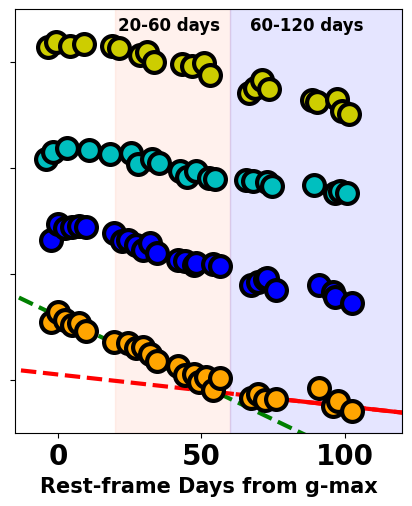

In [53]:
from matplotlib.patches import Rectangle
from scipy.optimize import curve_fit
from matplotlib import rc,rcParams
rc('font', weight='bold')
fig,ax1 = plt.subplots(figsize=(5,5.5))

plt.errorbar(tg[:42],amg[:42]+0.5,yerr=amge[:42],marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'g+0.5',linewidth = 5,linestyle='none')
plt.errorbar(ti[:42],ami[:42]-0.5,yerr=amie[:42], marker ='o', color = 'c',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'i',linewidth = 5,linestyle='none')
plt.errorbar(tr[:42],amr[:42],yerr=amre[:42],marker ='o', color = 'b',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'r',linewidth = 5,linestyle='none')
plt.errorbar(tz[:46],amz[:46]-1.5,yerr=amze[:46],marker ='o', color = '#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'z-1.5',linewidth = 5,linestyle='none')

#plt.plot([0,0],[-15,-24],color = 'gray',linestyle = '--')#,label = 'g-max')
#plt.plot([90.4400000000023,90.4400000000023],[-15,-24],color = 'm',linestyle = '--')#,label = '1st S-90d')
#ax1.plot([357.440000000002,357.440000000002],[-15,-24],color = 'g',linestyle = '--')#,label = '2nd S-357d')

#plt.text(0.5,-22.5,'g-max',color='gray',fontsize=15)
#plt.text(53,-22.5,'1st S-90d',color='m',fontsize=15)
#plt.text(370,-23.5,'2nd S-357d',color='g',fontsize=20)


#ax2 = ax1.twinx()
#ax2.plot(tug,amugp+0.5,marker= None,color ='orange',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
#d = 1070.1 *1e6 #pc
#M = np.array([-15.5,24.0])
#m1 = M[0] + 2.5*np.log10((d/10)**2)
#m2 = M[1] + 2.5*np.log10((d/10)**2)
#ax2.set_ylim(24.433, 15.933)
#ax2.tick_params(labelsize=30)
#ax2.set_ylabel(r'AB Apparent Magnitude (AB)',fontsize=20,fontweight='bold')


# Slopes in 1e-2 mag/day
slope1 = 1.3e-2
slope2 = 0.3e-2

# Reference point (first data point)
x_ref = tg[0]-20
y_ref = amg[0] + 0.5

# Calculate intercepts
intercept1 = -19.6 #y_ref - slope1 * x_ref
intercept2 = -19.05#y_ref - slope2 * x_ref
#print(intercept2)
# Generate lines
x_fit1 = np.linspace(tg[0]-20, max(tg), 60)
x_fit2 = np.linspace(tg[0]-60, max(tg), 120)
y_fit1 = slope1 * x_fit1 + intercept1
y_fit2 = slope2 * x_fit2 + intercept2

# Plot fitted lines
plt.plot(x_fit1, y_fit1, color='green',lw=3,linestyle='--', label=f'Fit with slope {slope1:.2e} mag/day')
plt.plot(x_fit2, y_fit2, color='red',lw=3, linestyle='--', label=f'Fit with slope {slope2:.2e} mag/day')
plt.plot(x_fit2[np.where(x_fit2>60)], y_fit2[np.where(x_fit2>60)], color='red',lw=3,)
#print(x_fit2[np.where(x_fit2>60)], y_fit2[np.where(x_fit2>60)])

#plt.yscale('log')
#plt.xscale('log')
ax1.set_ylim(-18.5,-22.5)
ax1.set_xlim(-15,120)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=False)  # Hide y-axis ticks and labels

ax1.set_xlabel('Rest-frame Days from g-max',fontsize =15,fontweight='bold')
#ax1.set_ylabel(r'Absolute Magnitude',fontsize=30,fontweight='bold')
ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
#ax1.legend(fontsize =20, loc='upper right')

r1a = Rectangle((20,-18.5),40,-22.5,color='coral',alpha=0.1,zorder=1)
r2a = Rectangle((60,-18.5),60,-22.5,color='blue',alpha=0.1,zorder=1)
#r3a = Rectangle((4,5e-3),4,1,color='lightgreen',alpha=0.1,zorder=1)
ax1.add_patch(r1a)
ax1.add_patch(r2a)
#ax1.add_patch(r3d)
ax1.text(21,-22.3,'20-60 days',fontsize=12)#,bbox={'facecolor': 'k', 'alpha': 0.2, 'pad': 4})
ax1.text(67,-22.3,'60-120 days',fontsize=12)#,bbox={'facecolor': 'k', 'alpha': 0.2, 'pad': 4})

#plt.legend(fontsize =20)
plt.savefig('LCzoom2.png', dpi = 300,bbox_inches='tight', transparent = True)


In [74]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.3])
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
              row=1, col=1)

fig.add_trace(go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
              row=1, col=2)
plt.show()

(-15.5, -24.0)

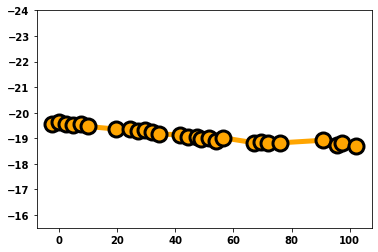

In [17]:
plt.errorbar(tg[:27],amg[:27]+0.5,yerr=amge[:27],marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'g+0.5',linewidth = 5)
#plt.errorbar(ti[:42],ami[:42],yerr=amie[:42], marker ='o', color = 'c',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'i',linewidth = 5)
#plt.errorbar(tr[:42],amr[:42],yerr=amre[:42],marker ='o', color = 'b',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'r',linewidth = 5)
#plt.errorbar(tz[:46],amz[:46]-1.5,yerr=amze[:46],marker ='o', color = '#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'z-1.5',linewidth = 5)
plt.ylim(-15.5,-24)

In [34]:
#last season detection decline rates
#max(tz[22:46]),  max(amz[22:46])
#min(tg[27:37]),  min(amg[27:37])
#min(tr[28:39]),  min(amr[28:39])
#min(ti[22:40]),  min(ami[22:40])

coeff2=np.polyfit(tg[27:37],amg[27:37],1,cov=True) #i-band 7.44625760e-03 mag/day, r-band 7.79071653e-03 mag/day
#np.poly1d(coeff2)  #g-band 3.05285348e-03 mag/day, z-band 8.17468973e-03 mag/day
coeff2

(array([ 3.05285348e-03, -1.89963095e+01]),
 array([[ 3.93727602e-06, -1.34713846e-03],
        [-1.34713846e-03,  4.62902519e-01]]))

In [39]:
#decline rates for each band in the first 100 days post explosion
#tg[1:19], amg[1:19]
#ti[2:14], ami[2:14]
#tz[1:22],amz[1:22]
#tr[1:19],amr[1:19]

coeff1=np.polyfit(tg[1:19],amg[1:19],1, cov=True) #g-band 1.18060307e-02, i-band 6.18852415e-03
#np.poly1d(coeff1) # z-band  6.71362648e-03, r-band 7.79013912e-03
the_error = np.sqrt(coeff1[1][0]) #error in decline rate.
coeff1[0], the_error

/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_3071/1673764026.py:9: RuntimeWarning: invalid value encountered in sqrt
  the_error = np.sqrt(coeff1[1][0]) #error in decline rate.


(array([ 1.18060307e-02, -2.01076055e+01]), array([0.00049991,        nan]))

In [57]:
tz[15:22], amz[15:22]

(<MaskedColumn name='phasez' dtype='float64' length=7>
  71.261765
  73.644665
  88.503165
  90.145265
  97.370865
  99.096265
 101.475965,
 <MaskedColumn name='mag_absz' dtype='float64' length=7>
 -20.333939
 -20.243518
 -20.139781
 -20.126166
 -20.155085
  -20.04325
 -20.013224)

In [55]:
#decline rates for each band in the first 80 days post explosion when there is a change in slope (first season)
#tg[7:19], amg[7:19]
#ti[5:14], ami[5:14]
#tz[5:14], amz[5:14]
#tr[6:19], amr[6:19]

coeff1=np.polyfit(tz[5:14], amz[5:14],1) #g-band 1.27095366e-02, i-band  7.64031014e-03
np.poly1d(coeff1) # z-band  8.50120768e-03, r-band 8.21650363e-03

poly1d([ 8.50120768e-03, -2.08343562e+01])

In [59]:
#decline rates for each band after the first 80 days post explosion when there is a change in slope (first season)
#tg[20:27], amg[20:27]
#ti[15:22], ami[15:22]
#tz[15:22], amz[15:22]
#tr[20:28], amr[20:28]

coeff1=np.polyfit(tz[15:22], amz[15:22],1) #g-band 2.65612758e-03, i-band 3.27312073e-03
np.poly1d(coeff1) # z-band  8.48553900e-03, r-band 5.45894152e-03

poly1d([ 8.48553900e-03, -2.09041012e+01])

In [ ]:
first 60 days #g-band 1.27095366e-02, i-band  7.64031014e-03, z-band  8.50120768e-03, r-band 8.21650363e-03
after 60 days #g-band 2.65612758e-03, i-band 3.27312073e-03,  z-band  8.48553900e-03, r-band 5.45894152e-03

In [60]:
#Early upper limits median for each band
np.median(amuz[np.where(tuz<= -193.27003499999998)]) #-16.946627
#np.median(amug[np.where(tug<= -197.291035)])
#np.median(amur[np.where(tur<= -192.36503499999998)])
#np.median(amui[np.where(tui<= -194.00703499999997)])

-17.683244

In [61]:
#Early upper limits median for each band
np.median(amuz[:25]), #tuz[:25] #-17.683244
#np.median(amug[:30]), #tug[:30]  #-16.572166
#np.median(amur[:29]), #tur[:29]  #-16.957373
#np.median(amui[:29]), #tui[:29] #-17.31414

(-17.683244,)